### ỨNG DỤNG THUẬT TOÁN DI TRUYỀN GIẢI BÀI TOÁN PERMUTATION FLOW SHOP SCHEDULING PROBLEM - PFSP
#### Bài toán PFSP 
Bài toán lập lịch flow shop hoán vị là bài toán có n công việc (J1, J2, ..., Jn) được xử lý trên m máy (M1, M2, ...Mm) với các đặc trưng:
1. Mỗi công việc Ji (i=1..n) có m thao tác, thao tác thứ j phải được xử lý ở trên máy Mj (j= 1,...,m). Một công việc chỉ có thể bắt đầu được xử lý trên máy Mj nếu nó được hoàn thành việc xử lý ở trên máy Mj-1 và máy Mj đang trống, không có khoảng thời gian dừng khi chuyển từ máy này sang máy khác
2. Trình tự xử lý các công việc ở trên tất cả các máy là như nhau. Tức là một công việc có thứ tự xử lý thứ i ở trên máy M1 thì nó cũng có trình tự xử lý thứ i trên các máy còn lại. (điểm khác so với bài toán flow shop tổng quát)
3. Thao tác của công việc Ji được xử lý trên máy Mj được kí hiệu là Oij và có thời gian xử lý cho trước là pij.
4. Khoảng thời gian kể từ khi bắt đầu xử lý các công việc cho tới khi hoàn thành việc xử lý tất cả các công việc được gọi là makespan của bài toán và được kí hiệu là Cmax.
   Việc giải quyết bài toán PFSP là xác định một lịch biểu các công việc sao cho makespan là nhỏ nhất. 


#### Giải thuật di truyền
1. Khởi tạo ngẫu nhiên quần thể ban đầu P1 gồm Npop giải pháp 
2. Chọn lọc: chọn Npop cặp chuỗi từ quần thể theo xác suất lựa chọn
3. Lai ghép: Áp dụng toán tử lai ghép cho từng cặp đã chọn ở bước 2 để tạo ra Npop giải pháp với xác suất lai ghép Pc. Nếu toán tử lai ghép không được áp dụng cho cặp được chọn, một trong những giải pháp được chọn vẫn sẽ được giữ nguyên dưới dạng một chuỗi mới.
4. Đột biến: áp dụng toán tử đột biến cho mỗi chuỗi Npop được tạo ra với xác xuất đột biến Pm (gán xác suất đột biến cho mỗi chuỗi, không phải cho mỗi bit 
5. Cập nhật: ngẫu nhiên loại bỏ một chuỗi khỏi quần thể hiện tại và thêm chuỗi tốt nhất trong quần thể trước đó vào quần thể hiện tại
6. Kết thúc: nếu thỏa mãn điều kiện dừng xác định trước thì dừng thuật toán, nếu chưa thỏa mãn thì quay lại bước 2.

In [1]:
import numpy as np
import math
import time
import random
import itertools
import queue
import pandas as pd
from IPython.display import display, Markdown

In [23]:
# đọc dữ liệu 
dataset = "3"

if dataset == "1":
    optimalObjective = 4534
elif dataset == "2":
    optimalObjective = 920
else:
    optimalObjective = 1302

filename = "data" + dataset + ".txt"
f = open(filename, 'r')
l = f.readline().split()

# number of jobs
n = int(l[0])

# number of machines
m = int(l[1])

# ith job's processing time at jth machine 
cost = []
    
for i in range(n):
    temp = []
    for j in range(m):
        temp.append(0)
    cost.append(temp)
    
for i in range(n):
    line = f.readline().split()
    for j in range(int(len(line)/2)):
        cost[i][j] = int(line[2*j+1])
    
f.close()

In [3]:
# khởi tạo quần thể gồm các cá thể, trong đó mỗi cá thể là một dãy các phần tử được hoán vị từ một tập hợp cí sẵn 
def initialization(Npop):
    pop = []
    for i in range(Npop):
        p = list(np.random.permutation(n))
        while p in pop:
            p = list(np.random.permutation(n))
        pop.append(p)
    
    return pop

In [4]:
# tính thời gian hoàn thành của một giải pháp được đưa vào
def calculateObj(solution):
    qTime = queue.PriorityQueue()
    qMachines = []
    for i in range(m):
        qMachines.append(queue.Queue())
    
    for i in range(n):
        qMachines[0].put(solution[i])
    
    busyMachines = []
    for i in range(m):
        busyMachines.append(False) # mỗi máy ban đầu đều không bận 
    
    time = 0
    
    job = qMachines[0].get()
    qTime.put((time+cost[job][0], 0, job))
    busyMachines[0] = True
    
    while True:
        time, mach, job = qTime.get()
        if job == solution[n-1] and mach == m-1:# nếu công việc cuối cùng hoàn thành trên máy cuối cùng 
            break
        busyMachines[mach] = False
        if not qMachines[mach].empty():
                j = qMachines[mach].get()
                qTime.put((time+cost[j][mach], mach, j))
                busyMachines[mach] = True
        if mach < m-1: #nếu chưa là máy cuối cùng 
            if busyMachines[mach+1] == False:
                qTime.put((time+cost[job][mach+1], mach+1, job))
                busyMachines[mach+1] = True
            else:
                qMachines[mach+1].put(job)
            
    return time

In [5]:
# # lai ghép: phép lai OX
# # parents= [[1, 2, 3, 4, 5, 6, 7, 8, 9], [4, 5, 2, 1, 8, 7, 6, 9, 3]]

# def crossover(parents):
  
#     parent1 = parents[0]
#     parent2 = parents[1]
    
#     length_of_parent = len(parent1)
#     cut1 = int(length_of_parent / 2 - length_of_parent / 4)
#     cut2 = int(length_of_parent - cut1)
#     child = [None] * length_of_parent
#     child[cut1:cut2+1] = parent1[cut1:cut2+1]
    
#     # Step 2: Create the ordered list of remaining elements from parent2
#     remaining_elements = []
#     for i in range(cut2+1, len(parent2)):
#         if parent2[i] not in child:
#             remaining_elements.append(parent2[i])
#     for i in range(0, cut2+1):
#         if parent2[i] not in child:
#             remaining_elements.append(parent2[i])
    
#     # Step 3: Fill in the child with the remaining elements
#     idx = (cut2 + 1) % len(child)  # Start filling after the second cut
#     for element in remaining_elements:
#         while child[idx] is not None:  # Find the next empty position
#             idx = (idx + 1) % len(child)
#         child[idx] = element

#     return child
# # child = order_crossover(parents)
# # # print("Child:", child)

In [6]:
def crossover(parents):
    pos = list(np.random.permutation(np.arange(n-1)+1)[:2])
    
    if pos[0] > pos[1]:
        t = pos[0]
        pos[0] = pos[1]
        pos[1] = t
    
    child = list(parents[0])
    
    for i in range(pos[0], pos[1]):
        child[i] = -1
    
    p = -1
    for i in range(pos[0], pos[1]):
        while True:
            p = p + 1
            if parents[1][p] not in child:
                child[i] = parents[1][p]
                break
    
    return child

In [7]:
# chọn lọc
def selection(pop):
    popObj = []
    for i in range(len(pop)): # tính giá tị hàm mục tiêu của mỗi cá thể trong quần thể 
        popObj.append([calculateObj(pop[i]), i])
    
    popObj.sort() # sắp xếp theo giá trị hàm mục tiêu tăng dần, các cá thể có giá trị hàm mục tiêu nhỏ nhất (tức là tốt nhất sẽ ở vị trí đầu tiên trong popObj 
    
    distr = []
    distrInd = []
    
    for i in range(len(pop)):
        distrInd.append(popObj[i][1])
        prob = (2*(i+1)) / (len(pop) * (len(pop)+1))
        distr.append(prob)
    
    parents = []
    for i in range(len(pop)):
        parents.append(list(np.random.choice(distrInd, 2, p=distr)))
    
    return parents


In [8]:

# đột biến bằng cách chọn hai vị trí ngẫu nhiên và chèn công việc từ vị trí thứ hai đến vị trí thứ nhất, các công việc giữa hai điểm này bị dịch chuyển 
def mutation(solution):
    pos = list(np.random.permutation(np.arange(n))[:2])
    if(pos[0] >pos[1]):
        t=pos[0]
        pos[0]=pos[1]
        pos[1]=t
    remJob = solution[pos[1]]
    for i in range (pos[1], pos[0], -1): # dịch chuyển công việc từ vị trí 1 đến vị trí 2 về sau
        solution[i] = solution[i-1]

    solution[pos[0]]=remJob # đặt công việc thứ hai vào vị trí thứ nhất
    return solution


In [9]:
# cập nhật 
def elitistUpdate(oldPop, newPop):
    bestSolInd = 0
    bestSol = calculateObj(oldPop[0])
    
    for i in range(1, len(oldPop)):
        tempObj = calculateObj(oldPop[i])
        if tempObj < bestSol:
            bestSol = tempObj
            bestSolInd = i
            
    rndInd = random.randint(0,len(newPop)-1)
    
    newPop[rndInd] = oldPop[bestSolInd]
    
    return newPop

In [10]:
def findBestSolution(pop):
    bestObj = calculateObj(pop[0])
    avgObj = bestObj
    bestInd = 0
    for i in range(1, len(pop)):
        tObj = calculateObj(pop[i])
        avgObj = avgObj + tObj
        if tObj < bestObj:
            bestObj = tObj
            bestInd = i
            
    return bestInd, bestObj, avgObj/len(pop)

In [25]:
# Number of population
Npop = 3
# Probability of crossover
Pc = 1.0
# Probability of mutation
Pm = 1.0
# Stopping number for generation
stopGeneration = 10000

# Start Timer
t1 = time.perf_counter()

# Creating the initial population
population = initialization(Npop)

# Run the algorithm for 'stopGeneration' times generation
for i in range(stopGeneration):
    # Selecting parents
    parents = selection(population)
    childs = []
    
    # Apply crossover
    for p in parents:
        r = random.random()
        if r < Pc:
            childs.append(crossover([population[p[0]], population[p[1]]]))
        else:
            if r < 0.5:
                childs.append(population[p[0]])
            else:
                childs.append(population[p[1]])
    
    # Apply mutation 
    for c in childs:
        r = random.random()
        if r < Pm:
            c = mutation(c)

    # Update the population
    population = elitistUpdate(population, childs)
    
    #print(population)
    #print(findBestSolution(population))

# Stop Timer
t2 = time.perf_counter()
    
# Results Time

bestSol, bestObj, avgObj = findBestSolution(population)
    
print("Population:")
print(population)
print() 

print("Solution:")
print(population[bestSol])
print() 

print("Objective Value:")
print(bestObj)
print()

print("Average Objective Value of Population:")
print("%.2f" %avgObj)
print()

print("%Gap:")
G = 100 * (bestObj-optimalObjective) / optimalObjective
print("%.2f" %G)
print()

print("CPU Time (s)")
timePassed = (t2-t1)
print("%.2f" %timePassed)

Population:
[[3, 18, 15, 11, 12, 1, 0, 14, 19, 17, 16, 10, 9, 4, 6, 8, 13, 7, 2, 5], [3, 18, 15, 11, 12, 14, 19, 17, 10, 9, 4, 6, 8, 13, 0, 7, 16, 2, 5, 1], [12, 0, 2, 15, 3, 18, 4, 1, 11, 14, 17, 13, 7, 16, 19, 10, 9, 6, 8, 5]]

Solution:
[3, 18, 15, 11, 12, 14, 19, 17, 10, 9, 4, 6, 8, 13, 0, 7, 16, 2, 5, 1]

Objective Value:
1302

Average Objective Value of Population:
1408.00

%Gap:
0.00

CPU Time (s)
51.51


C:\Users\admin\AppData\Local\Temp\ipykernel_1572\309319371.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20b', n)


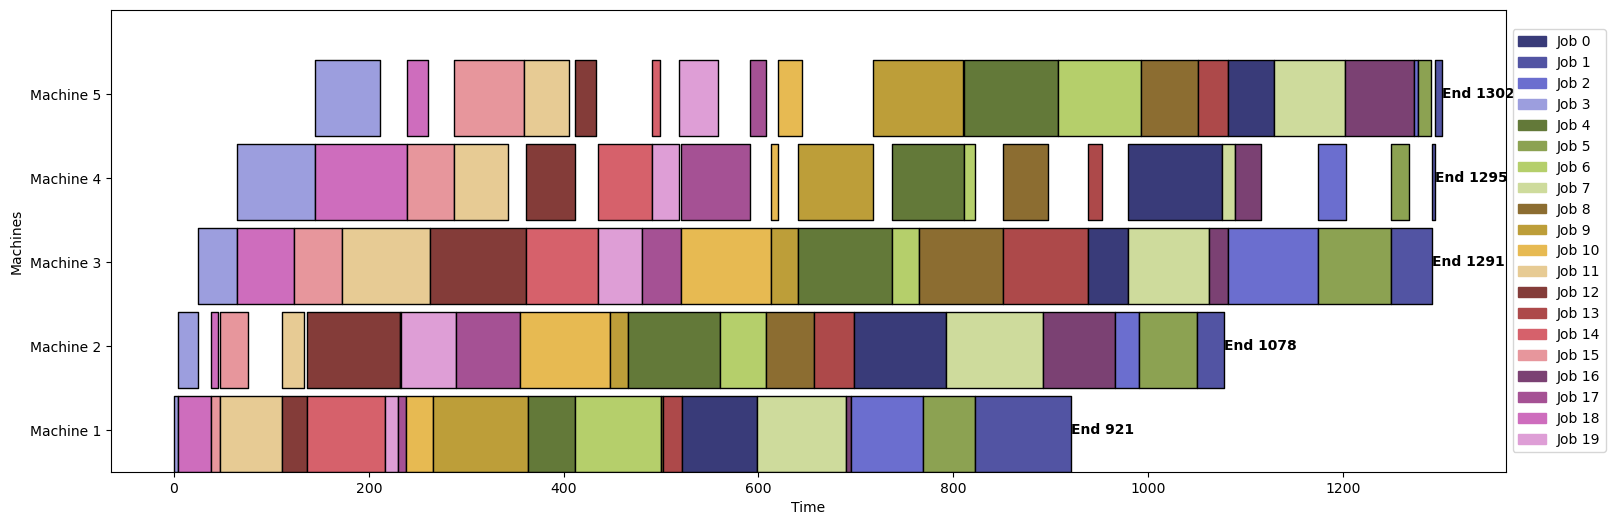

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
solution = population[bestSol]
# Hàm vẽ Gantt chart
def draw_gantt_chart(m, n, cost, solution):
    fig, gnt = plt.subplots(figsize=(18, 6)) 
# Đặt tên trục y 
    gnt.set_yticks([10 * i for i in range(1, m + 1)]) 
    gnt.set_yticklabels([f'Machine {i + 1}' for i in range(m)]) 
    gnt.set_ylim(5, 10 * (m + 1)) 
    # Đặt tên trục x 
    gnt.set_xlabel('Time') 
    gnt.set_ylabel('Machines') 
# Vẽ Gantt chart 
    colors = plt.cm.get_cmap('tab20b', n) 
    start_time = [0] * m 
    job_completion_time = [0] * m 
    for job in solution: 
        for machine in range(m): 
            end_time = start_time[machine] + cost[job][machine] 
            gnt.broken_barh([(start_time[machine], cost[job][machine])], (10 * (machine + 1) - 5, 9), facecolors=(colors(job % 20)), edgecolor='black') 
            start_time[machine] = end_time 
            if machine < m - 1: 
                start_time[machine + 1] = max(start_time[machine + 1], end_time) 
            job_completion_time[machine] = end_time 
    # Thêm chú thích 
    patches = [mpatches.Patch(color=colors(i % 20), label=f'Job {i}') for i in range(n)] 
    plt.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5)) 
    # In thời gian hoàn thành cuối cùng của mỗi máy 
    for i in range(m): 
        gnt.text(job_completion_time[i], 10 * (i + 1), f'End {job_completion_time[i]}', 
                 va='center', ha='left', color='black', fontweight='bold') 
    plt.savefig('data3.jpg')
    # Hiển thị biểu đồ 
    plt.show() 
# Gọi hàm vẽ Gantt chart 
draw_gantt_chart(m, n, cost, solution)

* Kết quả sau sau 5 lần chạy với mỗi dataset 
  - data1
    - Kết quả tốt nhất tìm được có thứ tự công việc: [7, 6, 4, 2, 5, 1, 0, 3]
    - chi phí tương ứng: 4534
    - chi phí trung bình: 5508.00
    - CPU Time (s): 19.65
  - data2
    - Kết quả tốt nhất tìm được có thứ tự công việc: [11, 2, 4, 12, 1, 7, 9, 10, 8, 5, 6, 0, 3]
    - chi phí tương ứng: 920
    - chi phí trung bình: 962.00
    - CPU Time (s): 35.15
  
  - data3
    - Kết quả tốt nhất tìm được có thứ tự công việc: [3, 18, 19, 13, 15, 17, 8, 9, 14, 6, 16, 2, 4, 11, 5, 7, 0, 12, 10, 1]
    - chi phí ứng: 1302
    - chi phí trung bình: 1399.33
    - CPU Time (s): 49,80